In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#Grab api key from folder
def read_api_key_file(filename):
    with open(filename, 'r') as file:
        api_key = file.readline().strip()
    return api_key

In [3]:
url = "https://content.guardianapis.com/search"


params = {
    'q': 'covid',
    'api-key': read_api_key_file("api_key.txt"),
    'show-fields': 'all',
}
    #Send a GET request to API endpoint
response = requests.get(url, params=params)

if response .status_code == 200:
    data = response.json()

    for article in data['response']['results']:
        print(article['webTitle'])
        print(article['webUrl'])
else:
    print('Error:', response.status_code)

Covid covid covid, everyone is getting covid covid covid | First Dog on the Moon
https://www.theguardian.com/commentisfree/2022/jul/04/covid-covid-covid-everyone-is-getting-covid-covid-covid
Rewriting Covid history is no bad thing | Letter
https://www.theguardian.com/world/2023/mar/28/rewriting-covid-history-is-no-bad-thing
Volunteering in sharp decline in England since Covid pandemic
https://www.theguardian.com/society/2023/may/02/volunteering-in-sharp-decline-in-england-since-covid-pandemic
China’s economy rebounds faster than expected after Covid reopening
https://www.theguardian.com/business/2023/apr/18/chinas-economy-rebounds-faster-than-expected-after-covid-reopening
Bruce Springsteen Day: New Jersey honor follows Covid diagnosis
https://www.theguardian.com/music/2023/apr/17/bruce-springsteen-day-new-jersey-honor-covid-diagnosis-for-singer
China’s Covid whistleblower in Wuhan reportedly freed after three years
https://www.theguardian.com/world/2023/may/03/china-covid-whistleblowe

In [47]:
# API parameters for searching articles about COVID
params = {
    'q': 'covid',
    'api-key': read_api_key_file("api_key.txt"),  # Replace with your own API key
    'from-date': '2022-01-01',
    'to-date': '2022-12-31',
    'page-size': 200,
    'order-by':'oldest'
}

data = {}
article_counts = defaultdict(int)

response = requests.get(url, params=params)
current_page =  0
total_pages  =  0

if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()  
    current_page =  data['response']['currentPage']
    total_pages  =  data['response']['pages']
    print(current_page, 'of', total_pages)
else:
    print('Error:', response.status_code)

1 of 69


In [48]:
while current_page <= (total_pages):
    print('Reading page:',current_page, 'of',total_pages)
            
    for article in data['response']['results']:
        # Extract the publication date from the article fields
        publication_date = article['webPublicationDate'][5:7]
        article_counts[publication_date] += 1
    params['page'] = current_page + 1
    if current_page > total_pages:
        break
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        current_page = data['response']['currentPage']
    else:
        print('Error:',response.status_code)
        break

Reading page: 1 of 69
Reading page: 2 of 69
Reading page: 3 of 69
Reading page: 4 of 69
Reading page: 5 of 69
Reading page: 6 of 69
Reading page: 7 of 69
Reading page: 8 of 69
Reading page: 9 of 69
Reading page: 10 of 69
Reading page: 11 of 69
Reading page: 12 of 69
Reading page: 13 of 69
Reading page: 14 of 69
Reading page: 15 of 69
Reading page: 16 of 69
Reading page: 17 of 69
Reading page: 18 of 69
Reading page: 19 of 69
Reading page: 20 of 69
Reading page: 21 of 69
Reading page: 22 of 69
Reading page: 23 of 69
Reading page: 24 of 69
Reading page: 25 of 69
Reading page: 26 of 69
Reading page: 27 of 69
Reading page: 28 of 69
Reading page: 29 of 69
Reading page: 30 of 69
Reading page: 31 of 69
Reading page: 32 of 69
Reading page: 33 of 69
Reading page: 34 of 69
Reading page: 35 of 69
Reading page: 36 of 69
Reading page: 37 of 69
Reading page: 38 of 69
Reading page: 39 of 69
Reading page: 40 of 69
Reading page: 41 of 69
Reading page: 42 of 69
Reading page: 43 of 69
Reading page: 44 of 

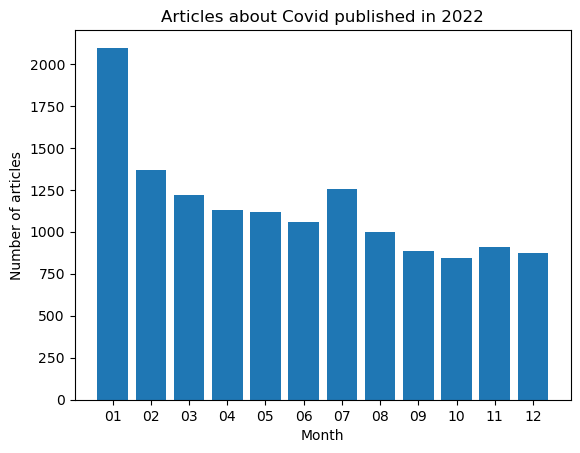

In [49]:

# Extract the sorted months and counts as lists
months = list(article_counts.keys())
counts = list(article_counts.values())

# Plot the article counts as a bar chart
plt.bar(months, counts)
plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.title('Articles about Covid published in 2022')
plt.show()

In [51]:
sum_counts = sum(counts)
print(sum_counts, 'Articles about Covid published in 2022')

13746 Articles about Covid published in 2022


## Web Scraping

### Part 2)
#### I decided to scrape: https://covid.cdc.gov/covid-data-tracker/ By inspecting the interactive chart you can find the XHR and intercept the JSON data. I explore this data and display the Total Cases vs New Cases in a pyplot.



In [10]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

url = 'https://covid.cdc.gov/covid-data-tracker/COVIDData/getAjaxData?id=us_trend_by_USA'
proxies = {}
response = requests.get(url=url, proxies=proxies)


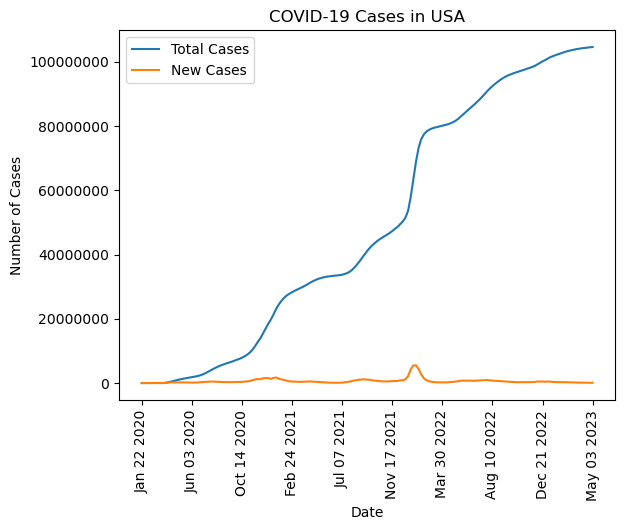

In [20]:
# Parse the JSON data
data = response.json()

# Extract the relevant data for the graph
x = []
y1 = [] # total cases
y2 = [] # new cases 

for d in data['us_trend_by_Geography']:
    x.append(d['date'])
    y1.append(d['tot_cases'])
    y2.append(d['New_case'])

# Create the line graph
plt.plot(x, y1, label='Total Cases')
plt.plot(x, y2, label='New Cases')

plt.xlabel('Date')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in USA')



# Set the xticks to 4 dates equally spaced over the range of dates in x
xticks = np.linspace(0, len(x) - 1, 10, dtype=int)
plt.xticks(xticks, [x[i] for i in xticks], rotation='vertical')

# Set the y-axis tick label format to plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()